In [36]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statistics import mode

# PART.1
## QN.1

Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [37]:
# folder path into a string 
path3 = r'C:\\Users\\Jalon\\Desktop\\python_projects'


In [38]:
#reading the df_final data set and assigning it to a new variable
df = pd.read_pickle(os.path.join(path3,'small.pkl'))



In [39]:
df.head(3)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spender_flag,median_days_since_prior_order,Customer_frequency,Gender,state,age,date_joined,n_dependants,fam_status,income
0,2398795,1,prior,2,3,7,15.0,196,1,1,...,High_spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,2254736,1,prior,4,4,7,29.0,196,1,1,...,High_spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
6,3108588,1,prior,8,1,14,14.0,196,2,1,...,High_spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423


## QN.2 

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

Answer: This Data Set doesn't contain any  sensitive informations as names, email addresses, physical addresses or phone numbers that can be traced to a particular person.


## QN3

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
* Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
* Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [40]:
# a function, that turns a value of a state to the apppropriate region
def region(row):
    
    if row['state'] in ["Maine","New Hampshire","Vermont", "Massachusetts", "Rhode Island", "Connecticut","New York",
                        "Pennsylvania", "New Jersey"]:
        return 'northeast'
    
    
    elif row["state"] in ["Wisconsin","Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", 
                          
                          "South Dakota", "Nebraska" ,"Kansas", "Minnesota", "Iowa" , "Missouri"]:
        return 'midwest'
    
    elif row['state'] in ["Delaware", "Maryland","District of Columbia", "Virginia", "West Virginia", "North Carolina"
                          , "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Mississippi", "Alabama", "Oklahoma"
                          ,  "Texas", "Arkansas" , "Louisiana"]:
        return 'south'
    
    # the last elif could just be written as else. I chose to do it manually and exact 
    # to be sure i didnt make any mistakes or forgot any state.
    
    elif row['state'] in ["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", "Alaska",
                           "Washington", "Oregon", "California", "Hawaii"]:
        return "west"
    

In [41]:
# making a column region 
df['region'] = df.apply(region, axis=1)

In [42]:
#quering the unique values of the column region
df["region"].unique()

array(['south', 'midwest', 'northeast', 'west'], dtype=object)

In [43]:
# aggregation of sum mean max and min of mean_prices by region
df.groupby('region').agg({'mean_prices': ['sum',"mean","max","min"],"user_id":["count"]})

mean_prices                                 user_id
                    sum      mean        max       min    count
region                                                         
midwest    6.982829e+06  9.822533  10.062416  9.582517   710899
northeast  5.264921e+06  9.819061  10.062416  9.582517   536194
south      9.906134e+06  9.821006  10.062416  9.582517  1008668
west       7.629351e+06  9.819415  10.062416  9.582517   776966

In [44]:
# number of customers by region and spender_flag

df.groupby(["region","spender_flag"]).agg({"user_id":["count"]})

user_id
                         count
region    spender_flag        
midwest   High_spender  121707
          low_spender   589192
northeast High_spender   91181
          low_spender   445013
south     High_spender  169671
          low_spender   838997
west      High_spender  131770
          low_spender   645196

In [45]:
#trying the same as the previous code with crosstab
#number of high_spender and lowe_spender by region

crosstab_region_spender = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [46]:
crosstab_region_spender

spender_flag,High_spender,low_spender
region,,
midwest,121707,589192
northeast,91181,445013
south,169671,838997
west,131770,645196


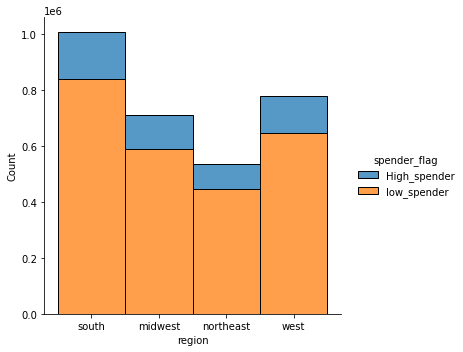

In [47]:
sns.displot(df, x="region", hue="spender_flag", multiple="stack")

Answer: As we can see in the table as well as in the last figure in all regions the number of low_spender customers tend to be way more than High_spender customers

## QN.4

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and 
exclude them from the data. Make sure you export this sample.


In [48]:
# creating a new column, that marks customers with more or less orders than 5

df.loc[df['max_order'] < 5, 'n_order_flag'] = 'low activity'
df.loc[df['max_order'] >= 5, 'n_order_flag'] = 'not low activity'

In [49]:
# creating a new dataframae with only customers, that has 5 or more orders

df1 = df[df["n_order_flag"]== 'not low activity']

In [50]:
# exporting the new data frame

df1.to_pickle(os.path.join(path3,
'high_activity_customers.pkl'))

In [51]:
df1

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Customer_frequency,Gender,state,age,date_joined,n_dependants,fam_status,income,region,n_order_flag
0,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,south,not low activity
2,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,south,not low activity
6,3108588,1,prior,8,1,14,14.0,196,2,1,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,south,not low activity
13,487368,15,prior,22,1,10,14.0,196,1,1,...,Frequent customer,Female,Indiana,69,2019-06-03,0,divorced/widowed,54313,midwest,not low activity
19,2231262,31,prior,17,3,11,8.0,196,14,1,...,Frequent customer,Female,Oklahoma,38,2019-01-22,1,married,52311,south,not low activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30329118,270906,178966,prior,60,5,20,3.0,30087,3,0,...,Frequent customer,Female,Connecticut,21,2018-07-25,2,living with parents and siblings,52938,northeast,not low activity
30329130,2998351,182190,prior,6,5,8,4.0,49453,14,1,...,Frequent customer,Female,Kentucky,73,2018-12-09,1,married,132301,south,not low activity
30329152,2384344,191406,prior,4,4,10,10.0,23653,33,0,...,Frequent customer,Female,Arizona,26,2017-09-01,2,married,68143,west,not low activity
30329171,1928449,202557,prior,4,4,9,16.0,43553,4,1,...,Frequent customer,Female,Minnesota,48,2017-10-11,2,married,36899,midwest,not low activity


## QN5-7

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

6. Create an appropriate visualization to show the distribution of profiles.

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [52]:
# a function take takes a dataframe and a column as parameter and gives out a column as flag
# depending on the frequency of the values of the column. Prints the describe column 

def flag(df, column):
    
    
    # assigning two variables to the upper quartile and the lower quartile   
    
    a = df[column].quantile([0.25]).iloc[0]
    b = df[column].quantile([0.75]).iloc[0]
    
    
    # creating a new flag column, using Q1 and Q3 to set limits for frquency
    
    df.loc[df[column] < a , column+'_flag'] = 'low '+column
    df.loc[(df[column] >= a) & (df[column] <= b)  , column +'_flag'] = 'average '+column 
    df.loc[df[column] > b , column+'_flag'] = 'High '+column 
    
    
    fig = plt.figure()
    
    # creating a histogram
    seab =sns.displot(df, x= (column +'_flag'), discrete=True)
    
    #creating a title for the figure
    seab.fig.suptitle(('Distribution of '+ column), fontsize=20)
    
    
    print(df[column].describe())
    
    
    #returning the aggregation of max, mean, min and median of the column values by the new flag column
    return df.groupby((column +'_flag')).agg({column: ['max','mean','min','median','count']})

### AGE

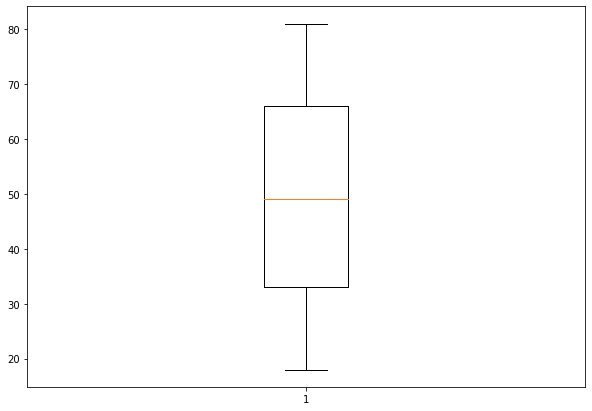

In [53]:
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df1["age"])
 
# show plot
plt.show()

In [54]:
df1["age"].value_counts().describe()

count       64.000000
mean     45784.343750
std       1365.000241
min      42512.000000
25%      44955.000000
50%      45946.000000
75%      46701.250000
max      48265.000000
Name: age, dtype: float64

C:\Users\Jalon\AppData\Local\Temp/ipykernel_7160/1076063528.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[column] < a , column+'_flag'] = 'low '+column


count    2.930198e+06
mean     4.949201e+01
std      1.849195e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.600000e+01
max      8.100000e+01
Name: age, dtype: float64


age                               
            max       mean min median    count
age_flag                                      
High age     81  74.027176  67   74.0   690604
average age  66  49.440235  33   49.0  1550640
low age      32  25.014625  18   25.0   688954

<Figure size 432x288 with 0 Axes>

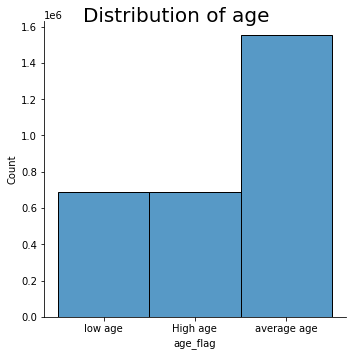

In [55]:
#applying the function flag on the column age and dataframe df1
flag(df1,"age")

Comment: It's clear that the most orders has been made by customer with the age range with min_age:33, max_age :66 and mean of age circa 49.


## Income

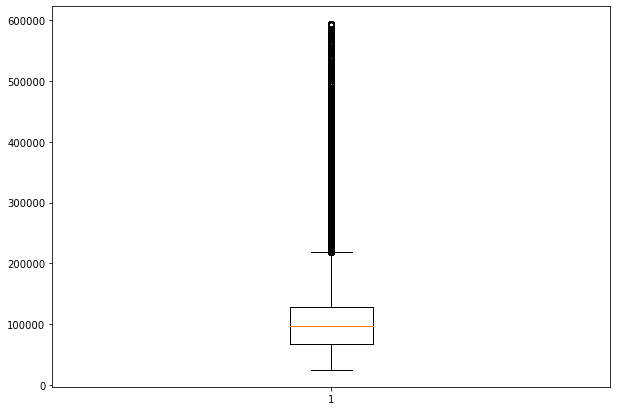

In [56]:
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df1["income"])
 
# show plot
plt.show()

C:\Users\Jalon\AppData\Local\Temp/ipykernel_7160/1076063528.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[column] < a , column+'_flag'] = 'low '+column


count    2.930198e+06
mean     9.972019e+04
std      4.314990e+04
min      2.590300e+04
25%      6.736700e+04
50%      9.677900e+04
75%      1.281560e+05
max      5.939010e+05
Name: income, dtype: float64


income                                          
                   max           mean     min    median    count
income_flag                                                     
High income     593901  154893.764755  128157  150212.0   732527
average income  128156   96606.050903   67367   96779.0  1465128
low income       67366   50776.285692   25903   52888.0   732543

<Figure size 432x288 with 0 Axes>

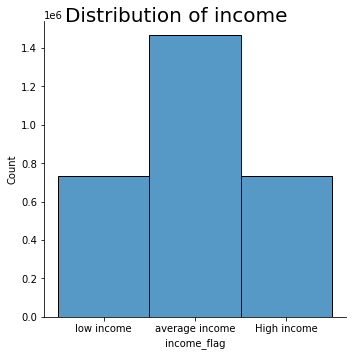

In [57]:
#applying column income and function df1 on the function flag
flag(df1,"income")

Comment: As we can see orders from customers with income between 67367 and 128156 have the highest number of orders (1465128 orders), they are twice as high as orders from low income (25903-67366) and high income (128157-593901) customers.

## n_dependants

In [58]:
#calculating the value_counts of n_dependants
df1["n_dependants"].value_counts()

3    735368
2    732141
0    732063
1    730626
Name: n_dependants, dtype: int64

In [59]:

df1["n_dependants"].describe()

count    2.930198e+06
mean     1.501950e+00
std      1.118744e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

<AxesSubplot:>

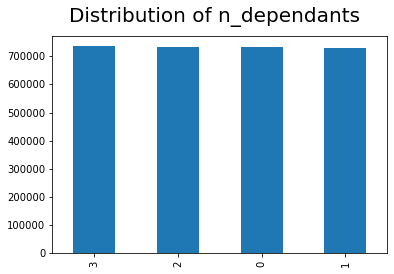

In [60]:
fig = plt.figure()

#creating a title for the figure
fig.suptitle(('Distribution of n_dependants'), fontsize=20)

# plotting the value_counts of n_dependants
df1["n_dependants"].value_counts().plot.bar()

Comment: As we can see in both previous cells the value_counts of the n_dependants is almost similar ( even if we group by region), so this paramter doesnt play a big role for analysing the customer with more potential of ordering.
But for the for the sake of this Task i will just divide n_dependants to with or without n_dependants.

In [61]:
#creating a flag column  for the  column n_dependants: with dependants or without dependants.
df1.loc[df1["n_dependants"] == 0 , "n_dependants_flag"] =  "no_dependants"
df1.loc[df1["n_dependants"] > 0  , "n_dependants_flag"] = "with_dependants" 
 

C:\Users\Jalon\AppData\Local\Temp/ipykernel_7160/1416912183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1["n_dependants"] == 0 , "n_dependants_flag"] =  "no_dependants"


In [62]:
df1["n_dependants_flag"].value_counts()

with_dependants    2198135
no_dependants       732063
Name: n_dependants_flag, dtype: int64

In [63]:
df1["n_dependants_flag"].describe()

count             2930198
unique                  2
top       with_dependants
freq              2198135
Name: n_dependants_flag, dtype: object

<AxesSubplot:>

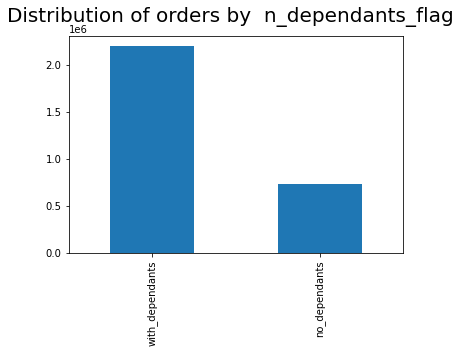

In [64]:
fig = plt.figure()

#creating a title for the figure
fig.suptitle(('Distribution of orders by  n_dependants_flag'), fontsize=20)

#bar plot of the value_counts of the n_dependants_flag column
df1["n_dependants_flag"].value_counts().plot.bar()

Comment: distribution of Gender is almost the same in the all DataSet

## Department_id

In [65]:
#reading the df_final data set and assigning it to a new variable
df_departments = pd.read_csv(os.path.join(path3,'departments_wrangled.csv'))
df_departments.head(2)


,Unnamed: 0,department
0,1,frozen
1,2,other


In [66]:
df_departments.rename(columns={"Unnamed: 0": "id"}, inplace = True)

In [67]:
df_departments

,id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [68]:
df1["department_id"].value_counts().describe()

count        21.000000
mean     139533.238095
std      202386.675256
min        3168.000000
25%       24011.000000
50%       66130.000000
75%      168186.000000
max      859877.000000
Name: department_id, dtype: float64

In [69]:
# Importing departments dataframe # using the departments id's insteaad of names, because they dont take much place
df_dept = pd.read_csv(os.path.join(path3,'departments_wrangled.csv'))
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [70]:
# Renaming Undamed:0 column to department_id
df_dept.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [71]:
df1["department_id"].value_counts()


4     859877
16    489900
19    262776
7     243498
1     200369
13    168186
3     106408
15     95589
20     94805
9      77275
17     66130
12     63688
14     63262
11     40153
18     39251
6      24011
5      13565
8       8720
21      6211
2       3356
10      3168
Name: department_id, dtype: int64

In [130]:
#creating a flag column  for departments according to the orders amount by department
df1.loc[ df1["department_id"].isin(["1","7","19","16","4"]) , "department_id_flag"] =  "Departments_with_high_orders_number"
df1.loc[ df1["department_id"].isin(["6","18","11","14","12","17","9","20","15","3","13"])  , "department_id_flag"] = "Departments_with_average_orders_numb er" 
df1.loc[ df1["department_id"].isin(["5","8","21","2","10"])  , "department_id_flag"] = "Departments_with_low_orders_number" 
 

<AxesSubplot:>

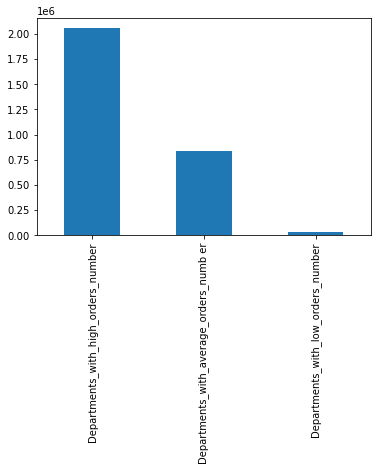

In [131]:
df1["department_id_flag"].value_counts().plot.bar()

Comment: The rest of queries were just done so i get more insights. It was not asked in this exercice.

## Familiy Status

In [74]:
df1["fam_status"].value_counts()

married                             2058612
single                               481197
divorced/widowed                     250866
living with parents and siblings     139523
Name: fam_status, dtype: int64

In [75]:
df1["fam_status"].describe()

count     2930198
unique          4
top       married
freq      2058612
Name: fam_status, dtype: object

<AxesSubplot:>

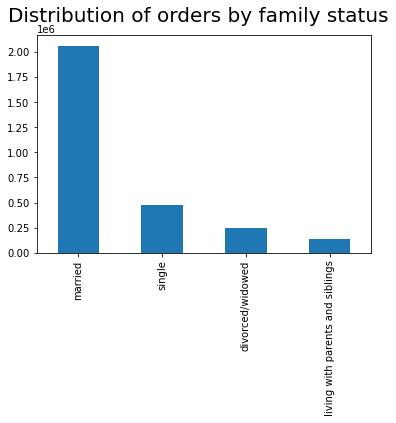

In [76]:
fig = plt.figure()

#creating a title for the figure
fig.suptitle(('Distribution of orders by family status'), fontsize=20)

df1["fam_status"].value_counts().plot.bar()

As we can see in the Barplot most of the orders has been made by married customers.

## Regions

<AxesSubplot:>

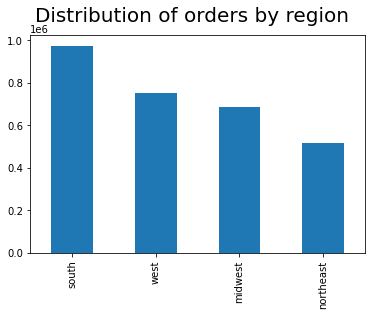

In [77]:
fig = plt.figure()

#creating a title for the figure
fig.suptitle(('Distribution of orders by region'), fontsize=20)

df1["region"].value_counts().plot.bar()

In [78]:
df1["region"].value_counts()

south        974751
west         750862
midwest      686945
northeast    517640
Name: region, dtype: int64

## QN8

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

<AxesSubplot:>

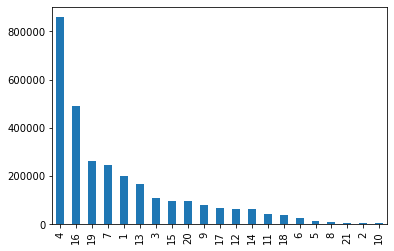

In [85]:
df1["department_id"].value_counts().plot.bar()


In [26]:
df1["department_id"].value_counts()

4     859877
16    489900
19    262776
7     243498
1     200369
13    168186
3     106408
15     95589
20     94805
9      77275
17     66130
12     63688
14     63262
11     40153
18     39251
6      24011
5      13565
8       8720
21      6211
2       3356
10      3168
Name: department_id, dtype: int64

In [25]:
df1["department_id"].value_counts().describe()

count        21.000000
mean     139533.238095
std      202386.675256
min        3168.000000
25%       24011.000000
50%       66130.000000
75%      168186.000000
max      859877.000000
Name: department_id, dtype: float64

In [79]:
# making a subset for the biggest deparment_id (by order frequency)
df_best_dep = df1[((df1["department_id"]=="4") | (df1["department_id"]=="16") | (df1["department_id"]=="19") 
                 | (df1["department_id"]=="1")  | (df1["department_id"]=="7")  )]

##### To make the vizualisations and tables more clear and easy i will only consider the best departments in the rest of the exercie

### Age_flag

In [81]:
#creating a table with regions as index and different age_flags as columns
# values are order_id frequancies
crosstab1 = pd.crosstab(df_best_dep['region'], df_best_dep['age_flag'], dropna = False)
crosstab1

age_flag,High age,average age,low age
region,,,
midwest,113470,257167,111313
northeast,86529,190525,86272
south,160532,361650,162668
west,125245,277920,123129


<AxesSubplot:xlabel='region'>

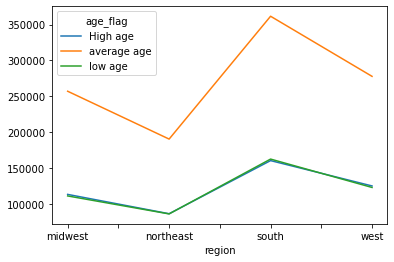

In [84]:
crosstab1.plot()

In [85]:
#creating a table with department_id as index and different age_flags as columns
# values are order_id frequancies
crosstab_age_dep = pd.crosstab(df_best_dep['department_id'], df_best_dep['age_flag'], dropna = False)
crosstab_age_dep

age_flag,High age,average age,low age
department_id,,,
1,47827,105855,46687
16,115078,258554,116268
19,61729,139302,61745
4,203437,454681,201759
7,57705,128870,56923


<AxesSubplot:xlabel='department_id'>

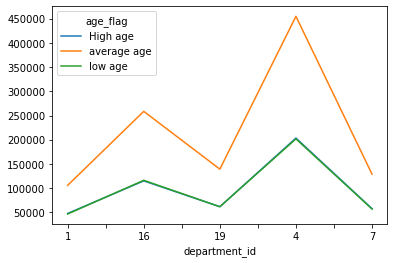

In [88]:
crosstab_age_dep.plot()

In [95]:
#pivot table: equal to grouping by regions then department_id then age_flag and number of orders as values
pd.pivot_table(df_best_dep,values= "order_id", index=["region","department_id","age_flag"], 
                aggfunc = "count" )



order_id
region    department_id age_flag             
midwest   1             High age        11080
                        average age     25217
                        low age         10985
          16            High age        26548
                        average age     61222
                        low age         26770
          19            High age        14364
                        average age     33120
                        low age         14004
          4             High age        47990
                        average age    107651
                        low age         46453
          7             High age        13488
                        average age     29957
                        low age         13101
northeast 1             High age         8438
                        average age     18371
                        low age          8241
          16            High age        20664
                        average age     45285
                        low age         20736
          19            High age        11290
                        average age     24597
                        low age         11285
          4             High age        35649
                        average age     78839
                        low age         35841
          7             High age        10488
                        average age     23433
                        low age         10169
south     1             High age        16022
                        average age     35492
                        low age         15593
          16            High age        38027
                        average age     85868
                        low age         39348
          19            High age        20442
                        average age     45757
                        low age         20467
          4             High age        66926
                        average age    151654
                        low age         68242
          7             High age        19115
                        average age     42879
                        low age         19018
west      1             High age        12287
                        average age     26775
                        low age         11868
          16            High age        29839
                        average age     66179
                        low age         29414
          19            High age        15633
                        average age     35828
                        low age         15989
          4             High age        52872
                        average age    116537
                        low age         51223
          7             High age        14614
                        average age     32601
                        low age         14635

In [158]:
df.head(1)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Customer_frequency,Gender,state,age,date_joined,n_dependants,fam_status,income,region,n_order_flag
0,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,south,not low activity


### Income_flag

In [133]:
#creating a table with regions as index and different income_flags as columns
# values are order_id frequancies
crosstab_reg_income = pd.crosstab(df_best_dep['region'], df_best_dep['income_flag'], dropna = False)
crosstab_reg_income

income_flag,High income,average income,low income
region,,,
midwest,121470,239188,121292
northeast,89618,180250,93458
south,166793,340979,177078
west,129726,261184,135384


<AxesSubplot:xlabel='region'>

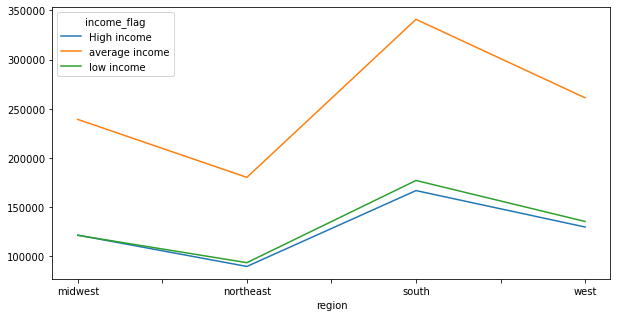

In [134]:
crosstab_reg_income.plot()

In [153]:
df1.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,n_dependants,fam_status,income,region,n_order_flag,department_id_flag,department,age_flag,income_flag,n_dependants_flag
0,2398795,1,prior,2,3,7,15.0,196,1,1,...,3,married,40423,south,not low activity,Departments_with_high_orders,NaN,low age,low income,with_dependants
2,2254736,1,prior,4,4,7,29.0,196,1,1,...,3,married,40423,south,not low activity,Departments_with_high_orders,NaN,low age,low income,with_dependants
6,3108588,1,prior,8,1,14,14.0,196,2,1,...,3,married,40423,south,not low activity,Departments_with_high_orders,NaN,low age,low income,with_dependants
13,487368,15,prior,22,1,10,14.0,196,1,1,...,0,divorced/widowed,54313,midwest,not low activity,Departments_with_high_orders,NaN,High age,low income,no_dependants
19,2231262,31,prior,17,3,11,8.0,196,14,1,...,1,married,52311,south,not low activity,Departments_with_high_orders,NaN,average age,low income,with_dependants


* While the average income clearly the highest in all the regions, depending on the region the difference between orders made by 
low and high income varies.


In [123]:
#creating a table with department_id as index and different income_flags as columns
# values are order_id frequancies
crosstab_dep_income = pd.crosstab(df_best_dep['department_id'], df_best_dep['income_flag'], dropna = False)
crosstab_dep_income

income_flag,High income,average income,low income
department_id,,,
1,51196,101230,47943
16,124102,249286,116512
19,57231,114428,91117
4,216463,442108,201306
7,58615,114549,70334


<AxesSubplot:xlabel='department_id'>

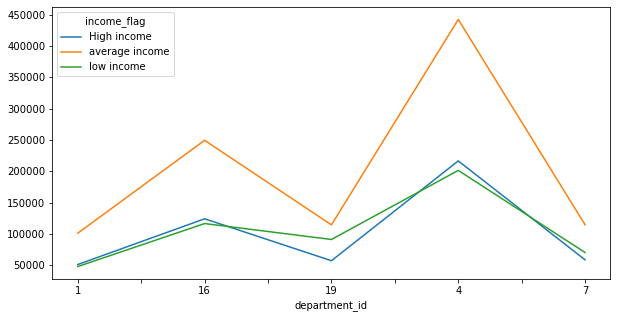

In [131]:
crosstab_dep_income.plot()

* While the average income category shows the highest number of orders in all deparments, the low and high income categories vary by department_id. Department 16, which stands for Household, shows a higher number of orders in the high income category than low income, as does category 4, which stands for produce.
The category 19, which stands for deli, shows a significantly lower number of orders in the high income category and a higher number of orders with customer with low income.




In [136]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [112]:
#pivot table: equal to grouping by regions then department_id then income_flag and number of orders as values
pd.pivot_table(df_best_dep,values= "order_id", index=["region","department_id","income_flag"], 
                aggfunc = "count" )



order_id
region    department_id income_flag             
midwest   1             High income        12395
                        average income     23597
                        low income         11290
          16            High income        29295
                        average income     58584
                        low income         26661
          19            High income        13802
                        average income     26737
                        low income         20949
          4             High income        51804
                        average income    103902
                        low income         46388
          7             High income        14174
                        average income     26368
                        low income         16004
northeast 1             High income         8998
                        average income     17715
                        low income          8337
          16            High income        21970
                        average income     44066
                        low income         20649
          19            High income        10024
                        average income     20609
                        low income         16539
          4             High income        37780
                        average income     77369
                        low income         35180
          7             High income        10846
                        average income     20491
                        low income         12753
south     1             High income        16915
                        average income     34328
                        low income         15864
          16            High income        40931
                        average income     83125
                        low income         39187
          19            High income        18666
                        average income     37768
                        low income         30232
          4             High income        71303
                        average income    147191
                        low income         68328
          7             High income        18978
                        average income     38567
                        low income         23467
west      1             High income        12888
                        average income     25590
                        low income         12452
          16            High income        31906
                        average income     63511
                        low income         30015
          19            High income        14739
                        average income     29314
                        low income         23397
          4             High income        55576
                        average income    113646
                        low income         51410
          7             High income        14617
                        average income     29123
                        low income         18110

### n_dependants_flag

In [113]:
#creating a table with regions as index and different n_dependants_flags as columns
# values are order_id frequancies
crosstab_reg_n_dep = pd.crosstab(df_best_dep['region'], df_best_dep['n_dependants_flag'], dropna = False)
crosstab_reg_n_dep

n_dependants_flag,no_dependants,with_dependants
region,,
midwest,120982,360968
northeast,89181,274145
south,171655,513195
west,131973,394321


<AxesSubplot:xlabel='region'>

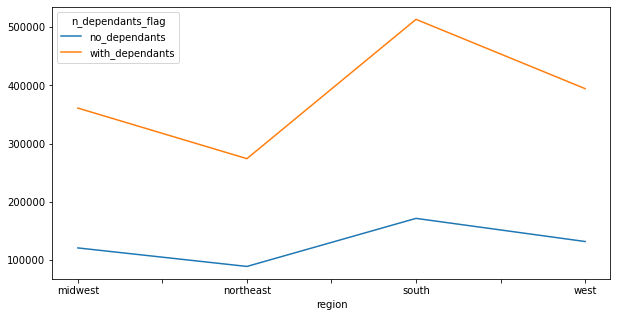

In [137]:
crosstab_reg_n_dep.plot()

As noted earlier, the n_dependants_flag column does not really enrich the analyses. Another Approach is needed for a better Inisght.


In [114]:
#creating a table with regions as index and different n_dependants_flags as columns
# values are order_id frequancies
crosstab_depa_n_dep = pd.crosstab(df_best_dep['department_id'], df_best_dep['n_dependants_flag'], dropna = False)
crosstab_depa_n_dep

n_dependants_flag,no_dependants,with_dependants
department_id,,
1,49981,150388
16,122509,367391
19,65503,197273
4,214777,645100
7,61021,182477


<AxesSubplot:xlabel='department_id'>

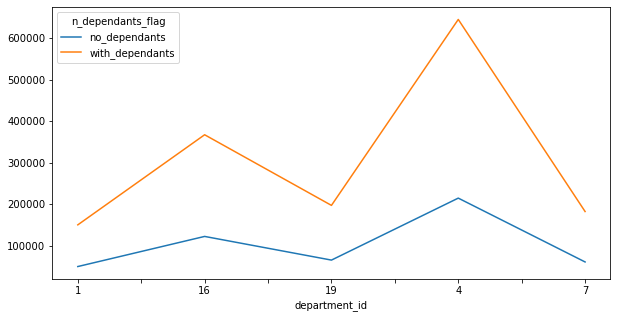

In [144]:
crosstab_depa_n_dep.plot()

In [115]:
#pivot table: equal to grouping by regions then department_id then dependants_flag and number of orders as values
pd.pivot_table(df_best_dep,values= "order_id", index=["region","department_id","n_dependants_flag"], 
                aggfunc = "count" )



order_id
region    department_id n_dependants_flag          
midwest   1             no_dependants         11691
                        with_dependants       35591
          16            no_dependants         29071
                        with_dependants       85469
          19            no_dependants         15406
                        with_dependants       46082
          4             no_dependants         50747
                        with_dependants      151347
          7             no_dependants         14067
                        with_dependants       42479
northeast 1             no_dependants          8644
                        with_dependants       26406
          16            no_dependants         21287
                        with_dependants       65398
          19            no_dependants         11503
                        with_dependants       35669
          4             no_dependants         36929
                        with_dependants      113400
          7             no_dependants         10818
                        with_dependants       33272
south     1             no_dependants         16993
                        with_dependants       50114
          16            no_dependants         40793
                        with_dependants      122450
          19            no_dependants         22019
                        with_dependants       64647
          4             no_dependants         71334
                        with_dependants      215488
          7             no_dependants         20516
                        with_dependants       60496
west      1             no_dependants         12653
                        with_dependants       38277
          16            no_dependants         31358
                        with_dependants       94074
          19            no_dependants         16575
                        with_dependants       50875
          4             no_dependants         55767
                        with_dependants      164865
          7             no_dependants         15620
                        with_dependants       46230

## Self made part
## Conclusion

In [125]:
df_users = df1

In [90]:
#creating a new df for unique customers ( A Customers df)
df_users= df_users.drop_duplicates(subset = "user_id")

In [96]:
df_users["user_id"].duplicated().sum()

0

In [97]:
df_users

,user_id,days_since_prior_order,max_order,loyalty_flag,mean_prices,spender_flag,median_days_since_prior_order,Customer_frequency,Gender,state,age,date_joined,n_dependants,fam_status,income,region,n_order_flag,age_flag
0,1,15.0,10,New customer,10.062416,High_spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,south,not low activity,low age
13,15,14.0,22,Regular customer,9.897543,low_spender,10.0,Frequent customer,Female,Indiana,69,2019-06-03,0,divorced/widowed,54313,midwest,not low activity,High age
19,31,8.0,20,Regular customer,9.897543,low_spender,6.0,Frequent customer,Female,Oklahoma,38,2019-01-22,1,married,52311,south,not low activity,average age
21,43,3.0,11,Regular customer,9.897543,low_spender,10.0,Frequent customer,Female,Tennessee,41,2018-11-19,1,married,123723,south,not low activity,average age
31,52,6.0,27,Regular customer,9.897543,low_spender,8.0,Frequent customer,Female,Alabama,64,2018-01-30,2,married,40974,south,not low activity,average age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30313537,194984,7.0,5,New customer,10.062416,High_spender,1.0,Frequent customer,Male,Georgia,39,2017-10-19,1,married,95638,south,not low activity,average age
30321466,188074,30.0,5,New customer,10.062416,High_spender,30.0,Non-frequent customer,Male,Mississippi,51,2018-02-08,3,married,146343,south,not low activity,average age
30321520,74374,1.0,7,New customer,10.062416,High_spender,9.0,Frequent customer,Female,Iowa,21,2018-06-01,1,living with parents and siblings,48412,midwest,not low activity,low age
30326829,142638,7.0,6,New customer,10.062416,High_spender,7.0,Frequent customer,Female,South Dakota,42,2019-05-23,3,married,141161,midwest,not low activity,average age


In [102]:
# creating a column with customer characteristics with high order amount
df_users.loc[ (df_users['income'] >= 67367.0) & (df_users["income"]<= 128156.0) & (df_users["age"] >= 33) & (df["age"]<= 66) 
, 'customers_flag_last'] ="fav_customer"

df_users.loc[(df_users["spender_flag"]=="High_spender")  & (df_users["fam_status"]=="married"), 'customers_flag_last'] ="fav_customer"
 


In [103]:
df_users

,user_id,days_since_prior_order,max_order,loyalty_flag,mean_prices,spender_flag,median_days_since_prior_order,Customer_frequency,Gender,state,age,date_joined,n_dependants,fam_status,income,region,n_order_flag,age_flag,customers_flag_last
0,1,15.0,10,New customer,10.062416,High_spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,south,not low activity,low age,fav_customer
13,15,14.0,22,Regular customer,9.897543,low_spender,10.0,Frequent customer,Female,Indiana,69,2019-06-03,0,divorced/widowed,54313,midwest,not low activity,High age,NaN
19,31,8.0,20,Regular customer,9.897543,low_spender,6.0,Frequent customer,Female,Oklahoma,38,2019-01-22,1,married,52311,south,not low activity,average age,NaN
21,43,3.0,11,Regular customer,9.897543,low_spender,10.0,Frequent customer,Female,Tennessee,41,2018-11-19,1,married,123723,south,not low activity,average age,fav_customer
31,52,6.0,27,Regular customer,9.897543,low_spender,8.0,Frequent customer,Female,Alabama,64,2018-01-30,2,married,40974,south,not low activity,average age,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30313537,194984,7.0,5,New customer,10.062416,High_spender,1.0,Frequent customer,Male,Georgia,39,2017-10-19,1,married,95638,south,not low activity,average age,fav_customer
30321466,188074,30.0,5,New customer,10.062416,High_spender,30.0,Non-frequent customer,Male,Mississippi,51,2018-02-08,3,married,146343,south,not low activity,average age,fav_customer
30321520,74374,1.0,7,New customer,10.062416,High_spender,9.0,Frequent customer,Female,Iowa,21,2018-06-01,1,living with parents and siblings,48412,midwest,not low activity,low age,NaN
30326829,142638,7.0,6,New customer,10.062416,High_spender,7.0,Frequent customer,Female,South Dakota,42,2019-05-23,3,married,141161,midwest,not low activity,average age,fav_customer


In [105]:
df_users.fillna(value="other customers", inplace = True)

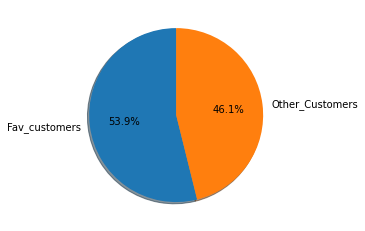

In [124]:
plt.pie(df_users["customers_flag_last"].value_counts(), labels = mylabels,autopct='%1.1f%%',  shadow=True, startangle=90)
mylabels = ["Fav_customers", "Other_Customers"]

plt.show() 

In [118]:
df_users["customers_flag_last"].value_counts()

other customers    85714
fav_customer       73378
Name: customers_flag_last, dtype: int64

Preferred customers represent more than half of the customers. Taking into account their characteristics, it is possible to identify future potential customers using external information such as dymography.
It is possible to optimize the service to attract customers with other characteristics such as young and not married and customers with no dependents.